<a href="https://colab.research.google.com/github/Oscar19922017/Ml/blob/master/ProcesadorImagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import keras
from tensorflow import keras
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4431872/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [2]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [3]:
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

60000 train set
10000 test set


In [4]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

y = 9 Ankle boot


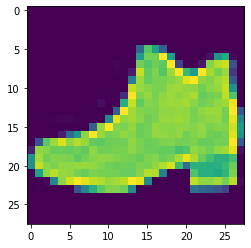

In [5]:
img_index = 15
label_index = y_train[img_index]
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
plt.imshow(x_train[img_index])
plt.show()

In [6]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [7]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [8]:
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [9]:
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)## Optimizar Parametros
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

y_tr_org = np.copy(y_train)
y_val_org = np.copy(y_valid)
y_tst_org = np.copy(y_test)

In [10]:
y_train = keras.utils.to_categorical(y_train, 10)
y_valid = keras.utils.to_categorical(y_valid, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)


In [12]:
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

55000 train set
5000 validation set
10000 test set


**Red Neuroal convolucional**

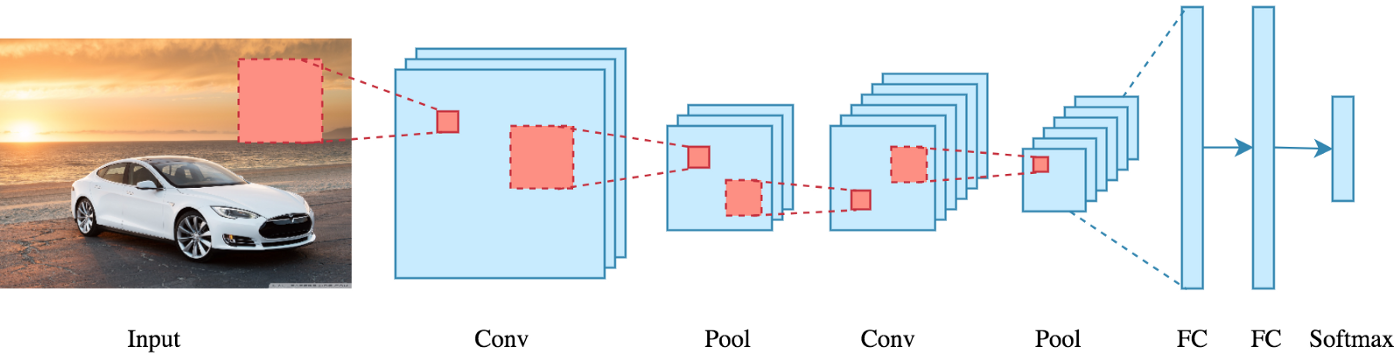

In [13]:
model = keras.models.Sequential() #sequential API
## Arquitectura red neuronal por convulucional
model.add(keras.layers.Conv2D(filters=64, kernel_size= (2,2), padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(keras.layers.MaxPooling2D(pool_size= (2,2)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(filters=32, kernel_size=(2,2), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 32)          0

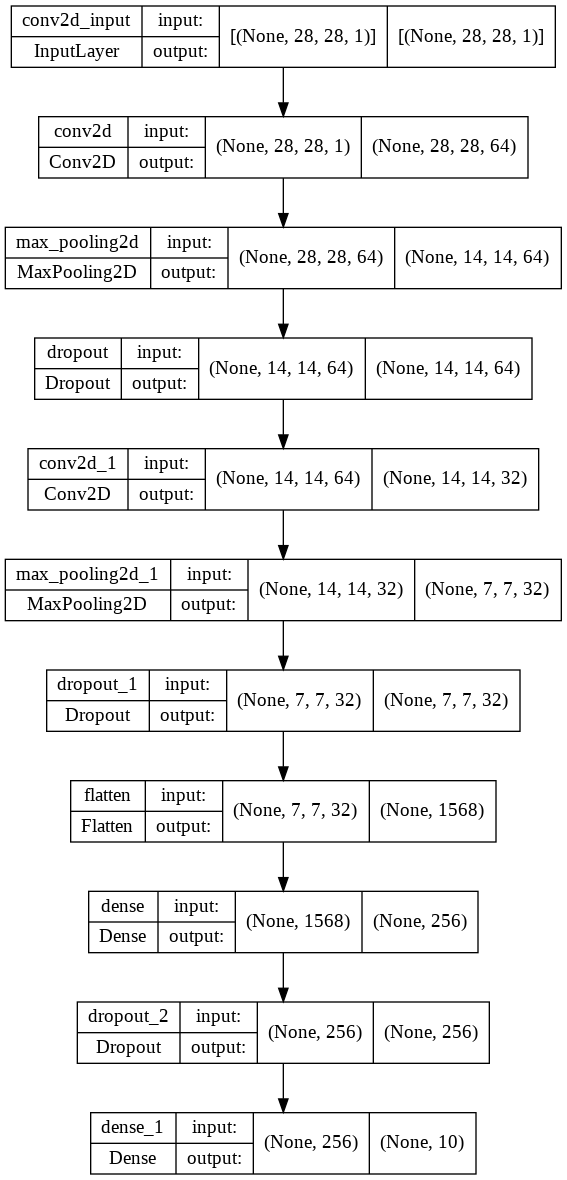

In [14]:
keras.utils.plot_model(model, "cnn_fashion.png", show_shapes=True)

In [15]:
opt = keras.optimizers.Adam(lr=0.001) #specify the learning rate for Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [16]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("CNN_fashion.h5", save_best_only=True)

history= model.fit(x_train,
         y_train,
         batch_size=3,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpoint_cb])

Epoch 1/10
18334/18334 [==============================] - 211s 11ms/step - loss: 0.5208 - accuracy: 0.8107 - val_loss: 0.3459 - val_accuracy: 0.8760
Epoch 2/10
18334/18334 [==============================] - 202s 11ms/step - loss: 0.4053 - accuracy: 0.8531 - val_loss: 0.2943 - val_accuracy: 0.8896
Epoch 3/10
18334/18334 [==============================] - 199s 11ms/step - loss: 0.3878 - accuracy: 0.8608 - val_loss: 0.3029 - val_accuracy: 0.8916
Epoch 4/10
18334/18334 [==============================] - 204s 11ms/step - loss: 0.3794 - accuracy: 0.8629 - val_loss: 0.3692 - val_accuracy: 0.8820
Epoch 5/10
18334/18334 [==============================] - 212s 12ms/step - loss: 0.3768 - accuracy: 0.8639 - val_loss: 0.3428 - val_accuracy: 0.8878
Epoch 6/10
18334/18334 [==============================] - 213s 12ms/step - loss: 0.3812 - accuracy: 0.8671 - val_loss: 0.3700 - val_accuracy: 0.8914
Epoch 7/10
18334/18334 [==============================] - 216s 12ms/step - loss: 0.3815 - accuracy: 0.8663

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4564608335494995
Test accuracy: 0.8679999709129333


In [18]:
X_new = x_test[:10] # pretend these are new instances
y_pred = np.argmax(model.predict(X_new), axis=-1)
print("\nPredictions:\n" ,y_pred) ## print predictions

y_new = y_tst_org [:10]
print("\nActual values:\n" , y_new) #print the actual labels for the first 10 observations


Predictions:
 [7 2 1 1 0 1 4 6 5 7]

Actual values:
 [9 2 1 1 6 1 4 6 5 7]


In [19]:
from sklearn import metrics
from sklearn.metrics import  confusion_matrix

pred_all = np.argmax(model.predict(x_test), axis=-1)
cm = confusion_matrix(y_tst_org, pred_all)
cm 

array([[805,   0,  13,  29,  15,   1, 134,   0,   3,   0],
       [  0, 953,   0,  41,   3,   0,   0,   1,   2,   0],
       [ 17,   0, 833,   9, 101,   0,  40,   0,   0,   0],
       [ 15,   1,   7, 909,  51,   0,  17,   0,   0,   0],
       [  0,   1,  83,  25, 849,   0,  42,   0,   0,   0],
       [  0,   0,   0,   0,   0, 928,   0,  60,   0,  12],
       [148,   0, 118,  42, 131,   0, 555,   0,   6,   0],
       [  0,   0,   0,   0,   0,   1,   0, 992,   0,   7],
       [  7,   0,   3,   8,   5,   0,   2,   8, 966,   1],
       [  0,   0,   1,   0,   0,   3,   0, 105,   1, 890]])

Text(0.5, 257.44, 'Predicted label')

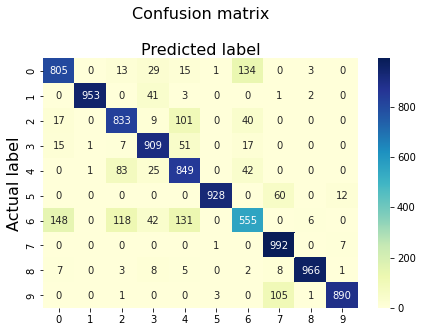

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

cls_names=[0,1,2,3,4,5,6,7,8,9] # name  of classes

fig, ax = plt.subplots()
ticks = np.arange(len(cls_names))
plt.xticks(ticks, cls_names)
plt.yticks(ticks, cls_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix\n', fontsize = 16)
plt.ylabel('Actual label',fontsize = 16)
plt.xlabel('Predicted label',fontsize = 16)

In [21]:
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_tst_org, pred_all, target_names=['0', '1', '2','3','4','5','6','7','8','9']))


Classification Report

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1000
           1       1.00      0.95      0.97      1000
           2       0.79      0.83      0.81      1000
           3       0.86      0.91      0.88      1000
           4       0.74      0.85      0.79      1000
           5       0.99      0.93      0.96      1000
           6       0.70      0.56      0.62      1000
           7       0.85      0.99      0.92      1000
           8       0.99      0.97      0.98      1000
           9       0.98      0.89      0.93      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_tst_org, pred_all)))

print('Micro Precision: {:.2f}'.format(precision_score(y_tst_org, pred_all, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_tst_org, pred_all, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_tst_org, pred_all, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_tst_org, pred_all, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_tst_org, pred_all, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_tst_org, pred_all, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_tst_org, pred_all, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_tst_org, pred_all, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_tst_org, pred_all, average='weighted')))




Accuracy: 0.87

Micro Precision: 0.87
Micro Recall: 0.87
Micro F1-score: 0.87

Macro Precision: 0.87
Macro Recall: 0.87
Macro F1-score: 0.87

Weighted Precision: 0.87
Weighted Recall: 0.87
Weighted F1-score: 0.87


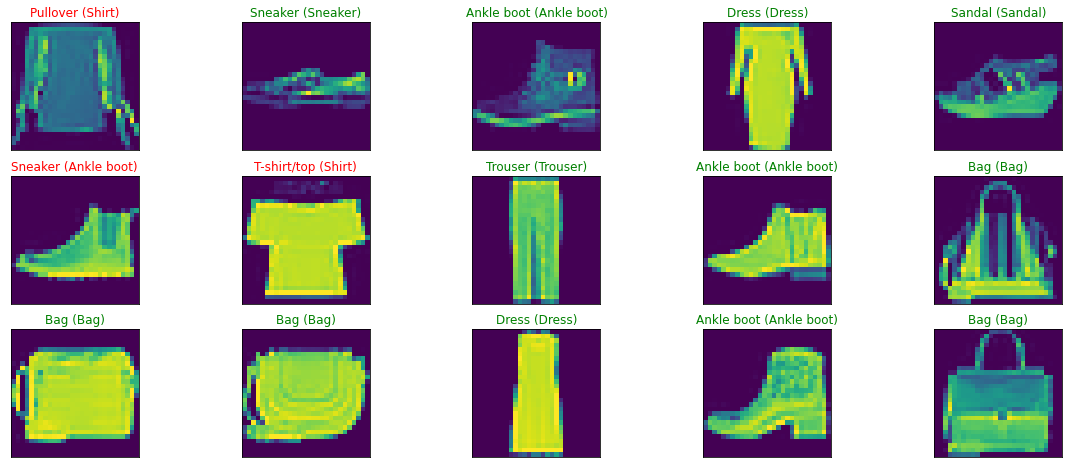

In [23]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))